In [61]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [62]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
df = df.iloc[:,1:]

In [64]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
encoder = LabelEncoder()

In [67]:
df['Species']= encoder.fit_transform(df['Species'])

In [68]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [69]:
df = df[df['Species']!=0][['SepalWidthCm','PetalLengthCm', 'Species']]


In [70]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [71]:
import matplotlib.pyplot as plt

In [72]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

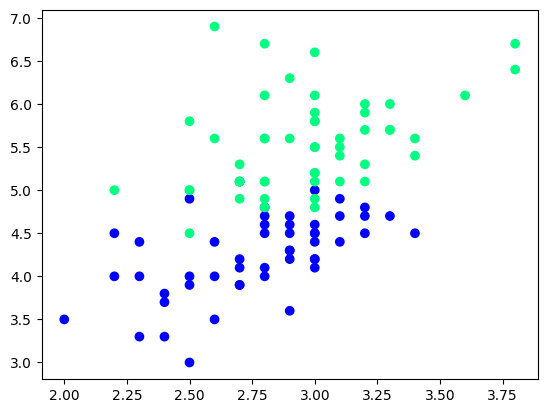

In [73]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'], c=df['Species'], cmap='winter');

In [74]:
# taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_var = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:, :].sample(5)

In [75]:
df_train

,SepalWidthCm,PetalLengthCm,Species
118,2.6,6.9,2
81,2.4,3.7,1
59,2.7,3.9,1
103,2.9,5.6,2
111,2.7,5.3,2
149,3.0,5.1,2
102,3.0,5.9,2
144,3.3,5.7,2
92,2.6,4.0,1
100,3.3,6.0,2


In [76]:
df_var

,SepalWidthCm,PetalLengthCm,Species
69,2.5,3.9,1
63,2.9,4.7,1
116,3.0,5.5,2
78,2.9,4.5,1
79,2.6,3.5,1


In [77]:
df_test

,SepalWidthCm,PetalLengthCm,Species
93,2.3,3.3,1
125,3.2,6.0,2
74,2.9,4.3,1
126,2.8,4.8,2
119,2.2,5.0,2


In [78]:
X_test = df_var.iloc[:, 0:2].values
y_test = df_var.iloc[:, -1].values

### Bagging

In [79]:
# Data for tree-1
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
111,2.7,5.3,2
81,2.4,3.7,1
92,2.6,4.0,1
81,2.4,3.7,1
111,2.7,5.3,2
144,3.3,5.7,2
103,2.9,5.6,2
102,3.0,5.9,2


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [81]:
dt_bag1 = DecisionTreeClassifier()

In [82]:
def evaluate(clf, X, y):
    clf.fit(X, y)
    plot_tree(clf)
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


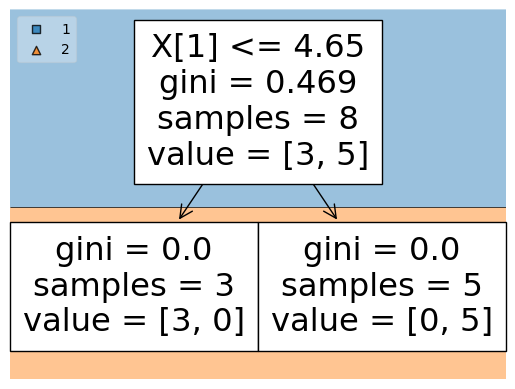

In [83]:
evaluate(dt_bag1, X, y)

In [84]:
# Data for tree
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag-2

,SepalWidthCm,PetalLengthCm,Species
118,0.6,4.9,0
144,1.3,3.7,0
103,0.9,3.6,0
103,0.9,3.6,0
103,0.9,3.6,0
144,1.3,3.7,0
118,0.6,4.9,0
111,0.7,3.3,0


0.2


C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)
C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


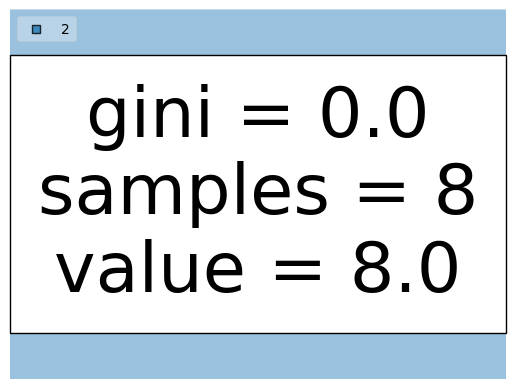

In [85]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

In [86]:
# Data for tree- 3
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
149,3.0,5.1,2
103,2.9,5.6,2
81,2.4,3.7,1
111,2.7,5.3,2
103,2.9,5.6,2
59,2.7,3.9,1
118,2.6,6.9,2
59,2.7,3.9,1


C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


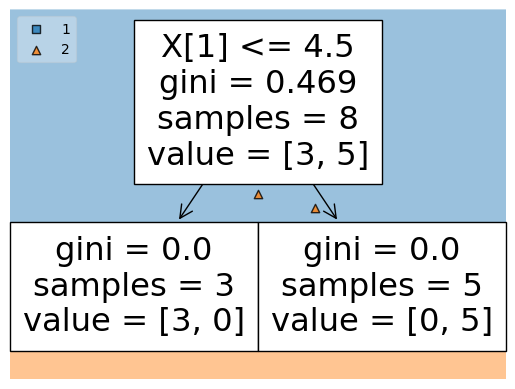

In [87]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

### Predict

In [88]:
df_test

,SepalWidthCm,PetalLengthCm,Species
93,2.3,3.3,1
125,3.2,6.0,2
74,2.9,4.3,1
126,2.8,4.8,2
119,2.2,5.0,2


In [90]:
print("Predictor 1", dt_bag1.predict(np.array([2.3, 3.3]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([2.3, 3.3]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([2.3, 3.3]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [1]


C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\uqba2\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### Pasting

In [91]:
# row sampling without replacement
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
92,2.6,4.0,1
149,3.0,5.1,2
59,2.7,3.9,1
81,2.4,3.7,1
144,3.3,5.7,2
118,2.6,6.9,2
103,2.9,5.6,2
100,3.3,6.0,2


#### Random Subspaces

In [93]:
# both column and rows
df = pd.read_csv('Iris.csv')
df1 = df.sample(10)

In [94]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
112,113,6.8,3.0,5.5,2.1,Iris-virginica
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
44,45,5.1,3.8,1.9,0.4,Iris-setosa
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [98]:
df1.sample(2, replace=True, axis=1)

,SepalLengthCm,SepalWidthCm
89,5.5,2.5
99,5.7,2.8
16,5.4,3.9
112,6.8,3.0
80,5.5,2.4
90,5.5,2.6
55,5.7,2.8
44,5.1,3.8
97,6.2,2.9
1,4.9,3.0


#### Random Patches

In [99]:
df1.sample(8, replace= True).sample(2, replace=True, axis=1)

,SepalWidthCm,Species
89,2.5,Iris-versicolor
1,3.0,Iris-setosa
97,2.9,Iris-versicolor
97,2.9,Iris-versicolor
44,3.8,Iris-setosa
97,2.9,Iris-versicolor
89,2.5,Iris-versicolor
89,2.5,Iris-versicolor
